In [6]:
#### PREDICTIVE MACHINE LEARNING MODEL (Non-descriptive Method)

# Import Modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import sklearn
import matplotlib
import numpy as np
from matplotlib import pyplot as plt


# Gather Inputs
df = pd.read_csv('Sales Jerseys.csv')

# Set Input
X = df[['Customer_Age', 'Customer_Gender']]

X = X.replace('M', 0)
X = X.replace('F', 1)

# Set Output
y = df['Product']

# Create Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X.values, y)

########### USER INTERACE ##########

model.predict([[34,0]])

####################################


array(['Short-Sleeve Classic Jersey, L'], dtype=object)

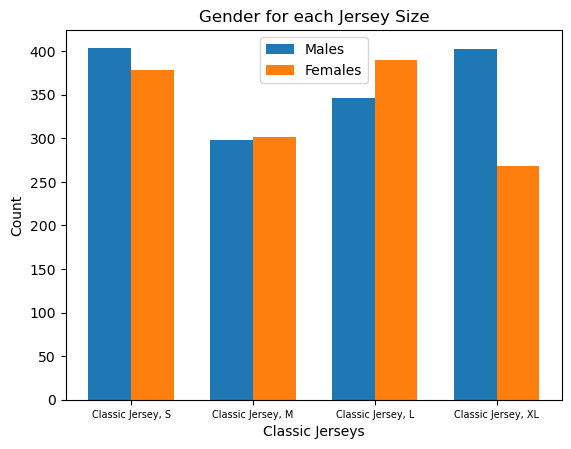

In [2]:
##### Bar chart for the number of males and females for each jersey size. (Descriptive Method #1)
categories = [
'Classic Jersey, S',
'Classic Jersey, M',
'Classic Jersey, L',
'Classic Jersey, XL']

# This is the data retrieved from the SQL 
males = [404,298,346,402]
females = [378,302,390,268]



# Width of each bar
bar_width = 0.35

# Positions of the bars on the x-axis
bar_positions = range(len(categories))

# Create a bar chart for males
plt.bar(bar_positions, males, width=bar_width, label='Males')

# Create a bar chart for females
plt.bar([p + bar_width for p in bar_positions], females, width=bar_width, label='Females')

# Add labels and title
plt.xlabel('Classic Jerseys', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Gender for each Jersey Size', fontsize=12)

# Add legend
plt.legend()

# Adjust x-axis tick labels
plt.xticks([p + bar_width / 2 for p in bar_positions], categories,  fontsize=7)


# Display the chart
plt.show()

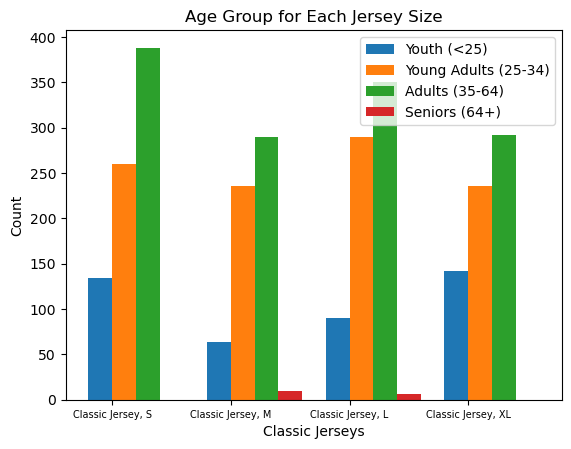

In [3]:
##### Bar chart for each age group for each jersey size (Descriptive Method #2)
categories = [
'Classic Jersey, S',
'Classic Jersey, M',
'Classic Jersey, L',
'Classic Jersey, XL']

# This is the data retrieved from the SQL server queries provided
youth = [134,64,90,142]
young_adults = [260,236,290,236]
adults = [388,290,350,292]
seniors = [0,10,6,0]

# Width of each bar
bar_width = 0.2

# Positions of the bars on the x-axis
bar_positions = range(len(categories))

# Create a bar chart for youth
plt.bar(bar_positions, youth, width=bar_width, label='Youth (<25)')

# Create a bar chart for young adults
plt.bar([p + bar_width for p in bar_positions], young_adults, width=bar_width, label='Young Adults (25-34)')

# Create a bar chart for adults
plt.bar([p + bar_width *2 for p in bar_positions], adults, width=bar_width, label='Adults (35-64)')

# Create a bar chart for seniors
plt.bar([p + bar_width*3 for p in bar_positions], seniors, width=bar_width, label='Seniors (64+)')

# Add labels and title
plt.xlabel('Classic Jerseys', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Age Group for Each Jersey Size', fontsize=12)

# Add legend
plt.legend()

# Adjust x-axis tick labels
plt.xticks([p + bar_width / 2 for p in bar_positions], categories,  fontsize=7)


# Display the chart
plt.show()

In [4]:
# ACCURACY TEST
df = pd.read_csv('Sales Jerseys.csv')


# Set input variable
X = df[['Customer_Age', 'Customer_Gender']]
X = X.replace('M', 0)
X = X.replace('F', 1)

# Set output variable
y = df['Product']

# Splitting the test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Implement the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculate the result
score = accuracy_score(y_test,predictions)
score

# The closer the output is to 1, the more accurate the model is 

0.4982078853046595

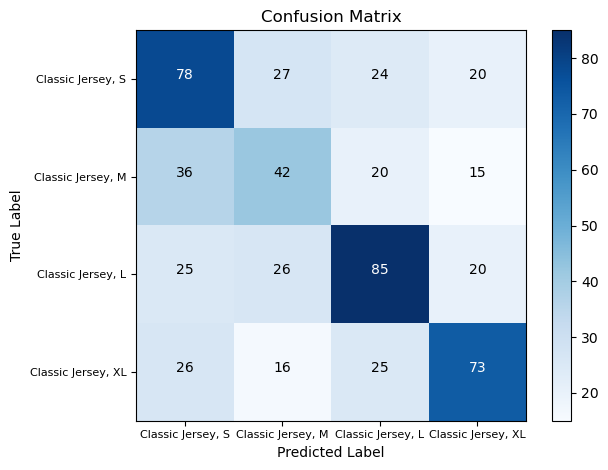

In [5]:
### CONFUSION MATRIX (Non-Descriptive Method)

# Define the mapping of strings to specific keys
string_to_key = {'Short-Sleeve Classic Jersey, S':0,
'Short-Sleeve Classic Jersey, M':1,
'Short-Sleeve Classic Jersey, L':2, 
'Short-Sleeve Classic Jersey, XL':3}

# Convert the array of strings to an array of keys
prediction_value = [string_to_key[string] for string in predictions]
test_value = [string_to_key[string] for string in y_test]


# Define the number of classes
num_classes = 4

# Compute confusion matrix
cm = confusion_matrix(test_value, prediction_value, labels=range(num_classes))

# Define class labels for visualization
class_labels = ['Classic Jersey, S','Classic Jersey, M','Classic Jersey, L','Classic Jersey, XL']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add tick marks and labels
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, class_labels, fontsize=8)
plt.yticks(tick_marks, class_labels, fontsize=8)

# Add labels to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Add axes labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the plot
plt.tight_layout()
plt.show()

